<a href="https://colab.research.google.com/github/aryansanchiya/Machine-Learning/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PyTorch End to end workflow

*What we are going to cover?*

`1. Data(Prepare and load)`

`2. Build a model`

`3. Fitting the model to Data.`

`4. Making Predictions and evalution on a model(Training)`

`5. Saving and loading Model`

`6. Putting it all together`




In [2]:
import torch
import torch.nn as nn #nn imports all building blocks of neural network
import matplotlib.pyplot as plt

In [3]:
#Data Preparing and loading
#Data can be anything, Excel SpreadSheet, Images of anykind, Youtube Videos, Audios or Podcast, DNA or Text
#Machine Learning is game of two Parts: 1)Get data into numerical representation 2)Build a modelto learn patterns in that numerical representation.

We will use a linear regression formula to make a straight line with **known** **parameters**.

**Parameters** are something that model learns.

Formula of Linear Regression is :- **y = a + bx**

weight = b

bias = a

In [4]:
#Create known Parameters

weight = 0.8
bias = 0.3

#Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias



In [5]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3160],
         [0.3320],
         [0.3480],
         [0.3640],
         [0.3800],
         [0.3960],
         [0.4120],
         [0.4280],
         [0.4440]]))

In [6]:
len(X), len(y)

(50, 50)

Tutorial - 43

[Splitting Data into Training and Test sets](https://www.udemy.com/course/pytorch-for-deep-learning/learn/lecture/32686050#content)

**One of the most important concept in machine learning**

Lets create training and test set for the data.

In [7]:
train_split = int(0.8 * len(X))
X_train,y_train = X[ :train_split],y[ :train_split]
X_test,y_test = X[train_split: ],y[train_split: ]

len(X_train),len(y_train),len(X_test),len(y_train)

(40, 40, 10, 40)

In [8]:
#Visulization of the Data:
def plot_predict(train_data = X_train,
                 train_label = y_train,
                 test_data = X_test,
                 test_label = y_test,
                 predictions = None):
  """
  Plots Training Data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot training data into blue:
  plt.scatter(train_data, train_label, c="b", s=4, label="Traning Data")

  #plot test data into green:
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

  #Are there predictions:
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop={"size":14});



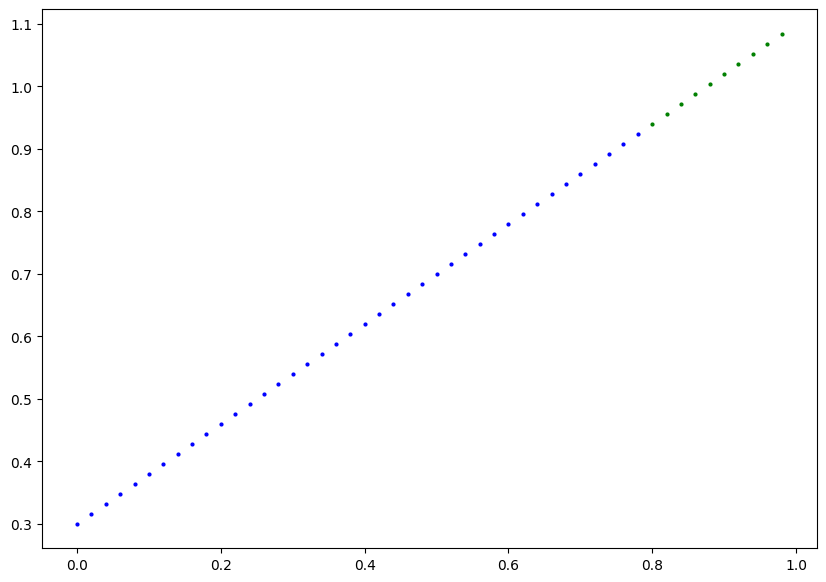

In [9]:
plot_predict()

In [10]:
torch.randn(1)

tensor([-0.6027])

In [11]:
#2. Build first PyTorch Model:
# Create Linear Regresssion Model class:
# <-- almost everything in PyTorch inherits from nn.module

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias
#Forward method to define the computation in the model.


**What our Model does?**

--> Start with random values (weight & bias)


--> Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create data)


**So How does it do so?**

--> Through main two algorithms:

1) Gradient Decent

2) Backpropagation

So we can check our model parameters or whats inside our model using .parameteres().

In [12]:
#Checking the contents of out PyTorch Model:

#Create a Random Seed:
torch.manual_seed(42)

#Create an instace of the model (this is subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weight,bias

(0.8, 0.3)

 Making Predictions using `torch.inference_mode()`

 When we pass data through our model, its going to run it through the `forward()`method.

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9560],
         [0.9720],
         [0.9880],
         [1.0040],
         [1.0200],
         [1.0360],
         [1.0520],
         [1.0680],
         [1.0840]]))

In [16]:
#Make Predictions with our models
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.9400],
        [0.9560],
        [0.9720],
        [0.9880],
        [1.0040],
        [1.0200],
        [1.0360],
        [1.0520],
        [1.0680],
        [1.0840]])

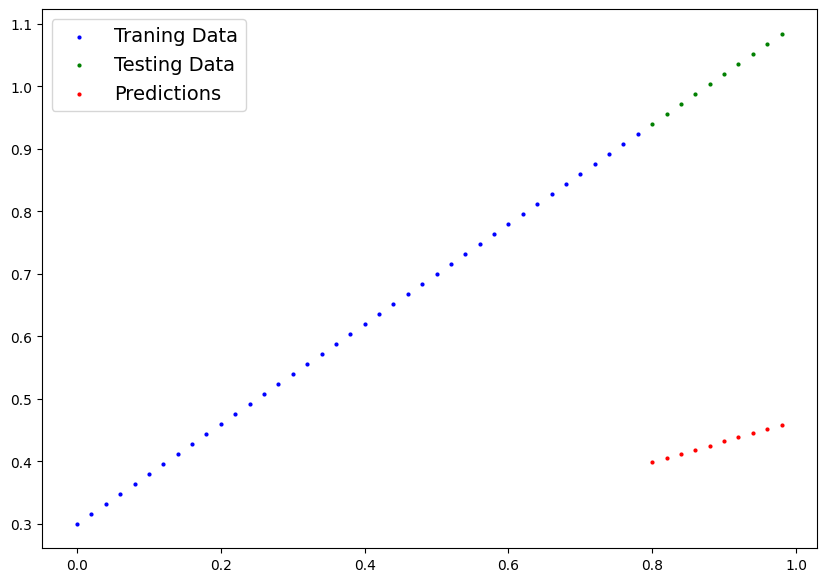

In [18]:
plot_predict(predictions=y_preds)

In [21]:
##Train Model

#The whole idea of training is for a model to move from some *unknown* parameters
# Or In other words from a poor representation of the data to better representation

# One way to measure how poor or how wrong your models predictions are is to use a loss function.

#Things we need to train the model:

#Loss function may also be called cost funtion or criterion in diffrent areas.
#Loss function is a function to measure how wrong your model's predictions are to the ideal output.
#Optimizer takes into account the loss of a model and adjust the model's parameters to imporove the loss function.

#and specifically for Pytorch, we need :
# A training Loop
# A Testing Loop

